# Wstępna analiza danych o retinopatii cukrzycowej

Data Set został pobrany z repozytorium UCI (http://archive.ics.uci.edu/ml/datasets/Diabetic+Retinopathy+Debrecen+Data+Set).
Dane umieszczone tam są w formacie arff. W celu obsługi formatu należy użyć funkcję z pakietu SciPy oraz pakietu Pandas dla większego komfortu przeglądania informacji.

In [1]:
from scipy.io import arff
import pandas as pd
#from google.colab import files
#uploaded = files.upload()

data = arff.loadarff('rethinpathy.arff')
df = pd.DataFrame(data[0])

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,Class
0,1.0,1.0,22.0,22.0,22.0,19.0,18.0,14.0,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1.0,b'0'
1,1.0,1.0,24.0,24.0,22.0,18.0,16.0,13.0,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0.0,b'0'
2,1.0,1.0,62.0,60.0,59.0,54.0,47.0,33.0,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0.0,b'1'
3,1.0,1.0,55.0,53.0,53.0,50.0,43.0,31.0,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0.0,b'0'
4,1.0,1.0,44.0,44.0,44.0,41.0,39.0,27.0,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0.0,b'1'


## Oznaczenie kolumn
0    - Oznaczenie jakości. 0 = zła jakość, 1 = dobra jakość<br>
1    - Wynik poprzedniego badania tj. czy było robione coś wczesniej, z czym pacjent przychodzi do okulisty. 1 oznacza nieprawidłowość siatkówki<br>
2-7  - Wynik wykrywania mikrotętniaków, wyrażone przez ilość takich poszerzeń naczynek<br>
8-15 - Znormalizowany wynik badania ilości wysięków. Normalizacja następuje przez iloczyn średnicy obszaru przez obraz który się bada<br>
16   - Znormalizowana odległość od środka plamki żółtej do środka tarczy nerwu wzrokowego <br>
17   - Średnica tarczy nerwu wzrokowego<br>
18   - Wyniki klasyfikacji patologicznych obrazów siatkówki za pomocą metody wykorzystującej modulacje amplitudy i częstotliwości<br>
19   - 1 = występują oznaki retinopatii, 0 = nie występują

Należy sprawdzić w jakim typie są zapisane dane.

In [2]:
df.dtypes

0        float64
1        float64
2        float64
3        float64
4        float64
5        float64
6        float64
7        float64
8        float64
9        float64
10       float64
11       float64
12       float64
13       float64
14       float64
15       float64
16       float64
17       float64
18       float64
Class     object
dtype: object

Ponieważ część danych jest binarnych lub wyrażonych tylko liczbami naturalnymi, lepiej będzie gdy zostaną przedstawione tylko w postaci całkowitej

In [3]:
df[df.columns[0:8]] = df[df.columns[0:8]].astype(int)
df[df.columns[18:20]] = df[df.columns[18:20]].astype(int)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,Class
0,1,1,22,22,22,19,18,14,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1,0
1,1,1,24,24,22,18,16,13,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0
2,1,1,62,60,59,54,47,33,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1
3,1,1,55,53,53,50,43,31,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0,0
4,1,1,44,44,44,41,39,27,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0,1


Należy teraz nazwać kolumny by nadać sens zaimportowanemu zestawowi liczb.

In [4]:
col_names = ['Quality', 'Pre-screening', 'MA result1', 'MA result2', 'MA result3', 'MA result4', 'MA result5', 'MA result6', 'Exudates result1', 'Exudates result2', 'Exudates result3', 'Exudates result4', 'Exudates result5', 'Exudates result6', 'Exudates result7',
            'Exudates result', 'Macula - Optic disc dist', 'Optic disc diameter', 'AM/FM classification', 'Class']
df.columns = col_names
df.head()

,Quality,Pre-screening,MA result1,MA result2,MA result3,MA result4,MA result5,MA result6,Exudates result1,Exudates result2,Exudates result3,Exudates result4,Exudates result5,Exudates result6,Exudates result7,Exudates result,Macula - Optic disc dist,Optic disc diameter,AM/FM classification,Class
0,1,1,22,22,22,19,18,14,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1,0
1,1,1,24,24,22,18,16,13,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0
2,1,1,62,60,59,54,47,33,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1
3,1,1,55,53,53,50,43,31,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0,0
4,1,1,44,44,44,41,39,27,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0,1


In [5]:
df.isnull().values.any()

False

# 2 zadanie

By rozwiązać problem klasyfikacji danych należy odpowiednio przygotować dataset. Najpierw przypisuje do nowego dataframe'u wszystkie kolumny prócz ostatniej żeby oddzielić dane od wyniku.
Ostatnia kolumna jest zapisywana do oddzielnej zmiennej jako wynik klasyfikacji.
W ostantim kroku dataframe jest rozdzielany na dane treningowe i dane testowe.

In [8]:
#normalizacja danych

data = df[df.columns[0:19]]
target = df['Class']
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#data = sc.fit_transform(data)
data.head()

,Quality,Pre-screening,MA result1,MA result2,MA result3,MA result4,MA result5,MA result6,Exudates result1,Exudates result2,Exudates result3,Exudates result4,Exudates result5,Exudates result6,Exudates result7,Exudates result,Macula - Optic disc dist,Optic disc diameter,AM/FM classification
0,1,1,22,22,22,19,18,14,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1
1,1,1,24,24,22,18,16,13,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0
2,1,1,62,60,59,54,47,33,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0
3,1,1,55,53,53,50,43,31,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0
4,1,1,44,44,44,41,39,27,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0


Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[107]	valid_0's auc: 0.775362
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[300]	valid_0's auc: 0.779082
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[510]	valid_0's auc: 0.815513
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[60]	valid_0's auc: 0.83253
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[569]	valid_0's auc: 0.809794
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[182]	valid_0's auc: 0.790807
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[90]	valid_0's auc: 0.754781
Training until validation scores don't improve for 100 rounds.
Early stop

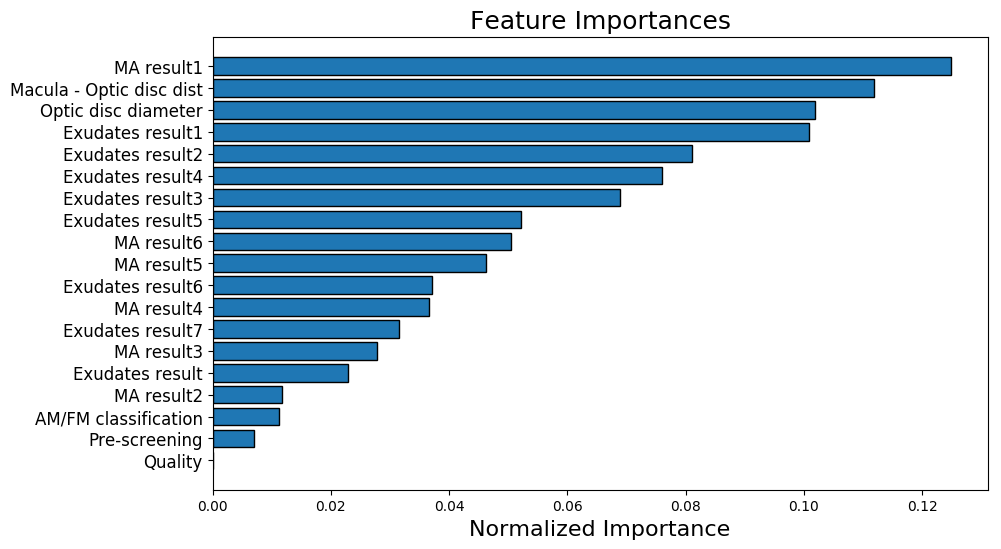

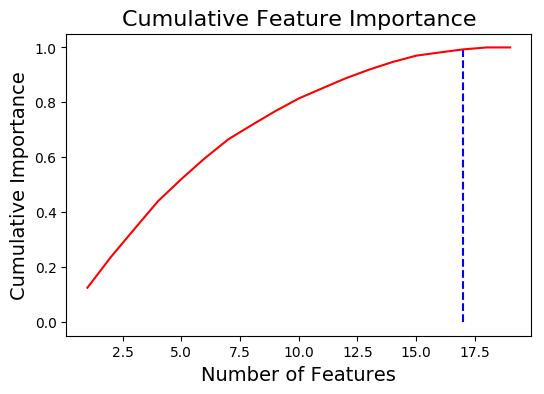

17 features required for 0.99 of cumulative importance


In [0]:
#!pip install feature_selector
#from feature_selector import FeatureSelector
# Features are in train and labels are in train_labels
#fs = FeatureSelector(data = data, labels = target)
# Pass in the appropriate parameters
#fs.identify_zero_importance(task = 'classification', 
#                            eval_metric = 'auc', 
#                            n_iterations = 10, 
#                             early_stopping = True)
# list of zero importance features
#zero_importance_features = fs.ops['zero_importance']
# plot the feature importances
#fs.plot_feature_importances(threshold = 0.99, plot_n = 19)

In [9]:
#% chorych
target[target == 1].count() / target.count() * 100


53.08427454387489

In [10]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.20, random_state = 10)

Pierwszym wykorzystanym algorytmem będzie naiwny klasyfikator bayesowski.

In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


gnb = GaussianNB()
pred = gnb.fit(data_train, target_train). predict(data_test)
print("Naive-Bayes acc: ", accuracy_score(target_test, pred, normalize = True))

Naive-Bayes acc:  0.5757575757575758


Wynik wychodzi słaby więc nie będzie to efektywny algorytm do tych danych.

Następnym sprawdzonym algorytmem będzie klasyfikacja liniowym wektorem nośnym

In [40]:
'''
BLOK WYKONUJE SIE OKOLO 3 MIN
'''
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

svc_model = LinearSVC(random_state=0, max_iter = 10000000)

pred = svc_model.fit(data_train, target_train).predict(data_test)

print("LinearSVC acc: ", accuracy_score(target_test, pred, normalize = True))

LinearSVC acc:  0.7445887445887446


In [12]:
#data = data.drop(columns =['Macula - Optic disc dist', 'Optic disc diameter'])
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#data = sc.fit_transform(data)


Ostatnim sprawdzonym algorytmem będzie K najbliższych sąsiadów

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(data_train,  target_train)

pred = knn.predict(data_test)

print("KNN accuracy: ", accuracy_score(target_test, pred))

KNN accuracy:  0.670995670995671


Precyzja jest znacznie lepsza od poprzednich algorytmów ale dalej wyniki nie są zadowalające.

In [14]:
#neural network
from keras import Sequential
from keras.layers import Dense

classifier = Sequential()
classifier.add(Dense(5, activation='sigmoid', kernel_initializer='random_normal', input_dim=19))
classifier.add(Dense(5, activation='sigmoid', kernel_initializer='random_normal'))
classifier.add(Dense(5, activation='softmax', kernel_initializer='random_normal'))
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
classifier.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['binary_accuracy'])
classifier.fit(data_train, target_train, epochs=1000)

prednn = classifier.predict(data_test)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/1000
920/920 [==============================] - 0s 123us/step - loss: 0.2504 - binary_accuracy: 0.4783
Epoch 2/1000
920/920 [==============================] - 0s 20us/step - loss: 0.2502 - binary_accuracy: 0.4783
Epoch 3/1000
920/920 [==============================] - 0s 19us/step - loss: 0.2500 - binary_accuracy: 0.5000
Epoch 4/1000
920/920 [==============================] - 0s 18us/step - loss: 0.2499 - binary_accuracy: 0.5217
Epoch 5/1000
920/920 [==============================] - 0s 18us/step - loss: 0.2498 - binary_accuracy: 0.5217
Epoch 6/1000
920/920 [==============================] - 0s 16us/step - loss: 0.2497 - binary_accuracy: 0.5217
Epoch 7/1000
920/920 [==============================] - 0s 17us/step - loss: 0.2497 - binary_accuracy: 0.5217
Epoch 8/1000
920/920 [==============================] - 0s 16us/step - loss: 0.2496 - binary_accuracy: 0.5217

In [15]:
prednn = (prednn > 0.5)
print("NN accuracy: ", accuracy_score(target_test, prednn))

NN accuracy:  0.7316017316017316


In [16]:
#DT
from sklearn import tree

dt = tree.DecisionTreeClassifier()
dt.fit(data_train,  target_train)

pred = dt.predict(data_test)

print("DT accuracy: ", accuracy_score(target_test, pred))


DT accuracy:  0.5974025974025974
